<div style='border: 3px solid #4682B4; background-color:#F0F8FF; padding:20px; text-align: center; border-radius: 15px; animation: slideIn 1.5s; box-shadow: 0 0 20px rgba(0, 0, 0, 0.1); position: relative;'>
    <p style="font-family: 'Arial', sans-serif; font-size: 18px; text-align: center; color:#2F4F4F;">
        <img src="https://media.licdn.com/dms/image/D4D03AQGc0oHpRuLDTw/profile-displayphoto-shrink_400_400/0/1683480985092?e=1724889600&v=beta&t=eZRQErSO_NCA2mrnpjEoi4YRnHpw5Ay7LzV5TlP-2sU" alt="Profile Picture" style="width: 180px; height: 180px; border-radius: 50%; box-shadow: 0 0 15px rgba(0,0,0,0.3); animation: rotateIn 2s infinite alternate; margin-bottom: 20px;">
        <br>💜 <span style="animation: colorChange 3s infinite;">Hey Friends!</span> 👋
        <br>
        I'm <b>Zaid Nserat</b>.
        <br> Skilled in <b>Python</b>, <b>Data Science</b>, and <b>Machine Learning</b>,
        <br> An aspiring <b>Artificial Intelligence</b> expert.
        <br><br>
        <div style="animation: float 3s infinite; display: inline-block;">
            Let's connect!
        </div>
        <br><br>
        <a href="https://www.kaggle.com/zaed2003" target="_blank" style="margin: 0 10px; color: #2F4F4F; transition: color 0.3s;"><i class="fab fa-kaggle fa-2x"></i></a>
        <a href="https://www.linkedin.com/in/zaid-nserat-192a7a275/" target="_blank" style="margin: 0 10px; color: #2F4F4F; transition: color 0.3s;"><i class="fab fa-linkedin fa-2x"></i></a>
    </p>
    <div class="corner-decor top-left"></div>
    <div class="corner-decor top-right"></div>
    <div class="corner-decor bottom-left"></div>
    <div class="corner-decor bottom-right"></div>
</div>
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">

<style>
    @keyframes rotateIn {
        0% {
            transform: rotate(0deg);
        }
        50% {
            transform: rotate(180deg);
        }
        100% {
            transform: rotate(360deg);
        }
    }

    @keyframes slideIn {
        from {
            transform: translateX(-100%);
            opacity: 0;
        }
        to {
            transform: translateX(0);
            opacity: 1;
        }
    }

    @keyframes shake {
        0%, 100% {
            transform: translateX(0);
        }
        25%, 75% {
            transform: translateX(-5px);
        }
        50% {
            transform: translateX(5px);
        }
    }

    a:hover {
        color: #4682B4 !important;
        animation: shake 0.5s;
    }

    @keyframes colorChange {
        0% {
            color: #2F4F4F;
        }
        50% {
            color: #4682B4;
        }
        100% {
            color: #2F4F4F;
        }
    }

    @keyframes float {
        0% {
            transform: translateY(0);
        }
        50% {
            transform: translateY(-10px);
        }
        100% {
            transform: translateY(0);
        }
    }

    .corner-decor {
        width: 40px;
        height: 40px;
        position: absolute;
        background-image: url('https://cdn.pixabay.com/photo/2016/04/01/09/56/pink-1299206_1280.png');
        background-size: cover;
        border-radius: 50%;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
        animation: rotateIn 5s infinite;
    }

    .top-left {
        top: -20px;
        left: -20px;
    }

    .top-right {
        top: -20px;
        right: -20px;
    }

    .bottom-left {
        bottom: -20px;
        left: -20px;
    }

    .bottom-right {
        bottom: -20px;
        right: -20px;
    }
</style>


In [1]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

License(s): unknown


 98% 160M/163M [00:01<00:00, 130MB/s]

100% 163M/163M [00:01<00:00, 147MB/s]


In [2]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


# importing Libary

In [38]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense ,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

# Path Data File

In [4]:
data_with_mask=os.listdir('/content/data/with_mask')
data_without_mask=os.listdir('/content/data/without_mask')
print(f"The size of the images inside the file data_with_mask {len(data_with_mask)}  ")
print(f"The size of the images inside the file data_without_mask {len(data_without_mask)}  ")
print()
print(data_with_mask[0:5])
print(data_without_mask[0:5])

The size of the images inside the file data_with_mask 3725  

The size of the images inside the file data_without_mask 3828  



['with_mask_1293.jpg', 'with_mask_1952.jpg', 'with_mask_3278.jpg', 'with_mask_303.jpg', 'with_mask_98.jpg']

['without_mask_3125.jpg', 'without_mask_3274.jpg', 'without_mask_938.jpg', 'without_mask_3489.jpg', 'without_mask_1308.jpg']


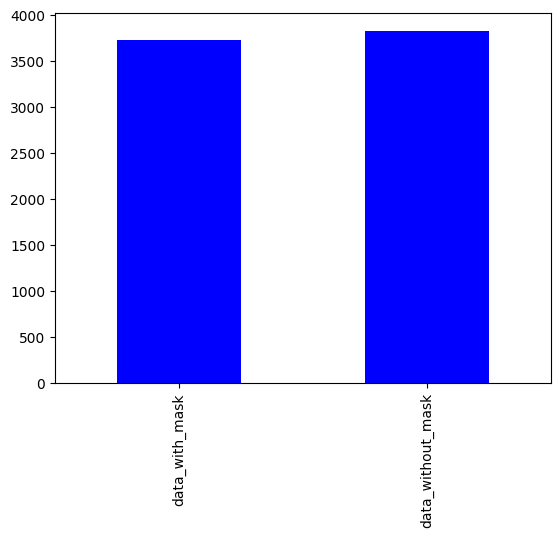

In [5]:
def visualization(mask,without,color):
  pd.Series({'data_with_mask':(mask),'data_without_mask':(without)}).plot(kind='bar',color=color)
  plt.show()
visualization(len(data_with_mask),len(data_without_mask),'blue')

# create the labels


In [6]:
label_with_mask=[1]*len(data_with_mask)# the creat the label data with mask
label_without_mask=[0]*len(data_without_mask)# the creat the label data without mask

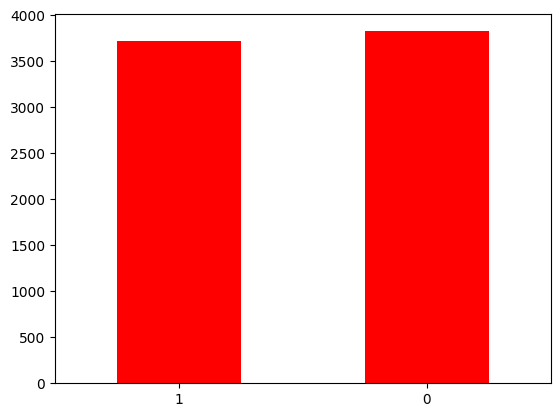

In [7]:
pd.Series({'1':len(label_with_mask),'0':len(label_without_mask)}).plot(kind='bar',color='red')
plt.xticks(rotation=1)
plt.show()

In [8]:
merge_labels=label_with_mask+label_without_mask

In [9]:
print(len(merge_labels))

7553


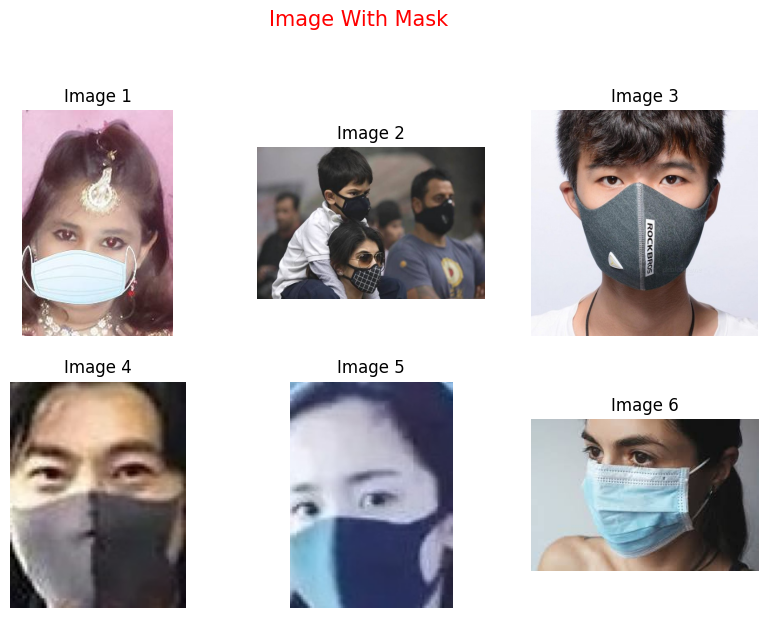

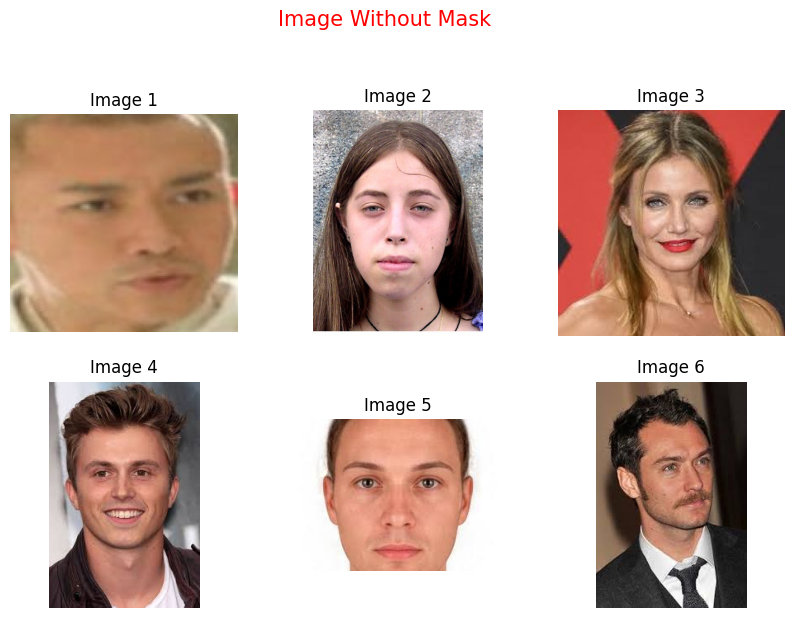

In [10]:
import random
def display_random_images(folder,num_sample,title):
  images=os.listdir(folder)
  images_sample=random.sample(images,num_sample)
  plt.figure(figsize=(10,10))
  for i , image in enumerate(images_sample):
    plt.subplot(3,3,i+1)
    image_path=os.path.join(folder,image)
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.suptitle(f'{title}',color='red',size=15)
    plt.axis('off')
  plt.show()
display_random_images('/content/data/with_mask',6,'Image With Mask')
display_random_images('/content/data/without_mask',6,'Image Without Mask')

In [11]:
def image_preprocessing(folder):
  images=os.listdir(folder)
  data=[]
  for img in images:
    image=os.path.join(folder,img)
    image=cv2.imread(image)
    image=cv2.resize(image,(128,128))# image Rgb Contains 3 Channels
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    image=np.array(image)
    data.append(image)
  return data
data_with_mask=image_preprocessing('/content/data/with_mask')
data_without_mask=image_preprocessing('/content/data/without_mask')

In [12]:
print(f"The length of image after image preprocessing mask image {len(data_with_mask)} ".title())
print(f"The length of image after image preprocessing not mask image {len(data_without_mask)} ".title())

The Length Of Image After Image Preprocessing Mask Image 3725 

The Length Of Image After Image Preprocessing Not Mask Image 3828 


# Merge all data

In [13]:
all_data=data_with_mask+data_without_mask


In [14]:
def scaling_data (data):
  return data/255

**train_test_split**

In [15]:
X=np.array(all_data)
y=np.array(merge_labels)


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=44,shuffle=True,stratify=y)

In [17]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [18]:
def display_images(images,title):
  plt.figure(figsize=(10,10))
  for i, image in enumerate(images):
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.suptitle(title,color='red',size=15)
  plt.show()

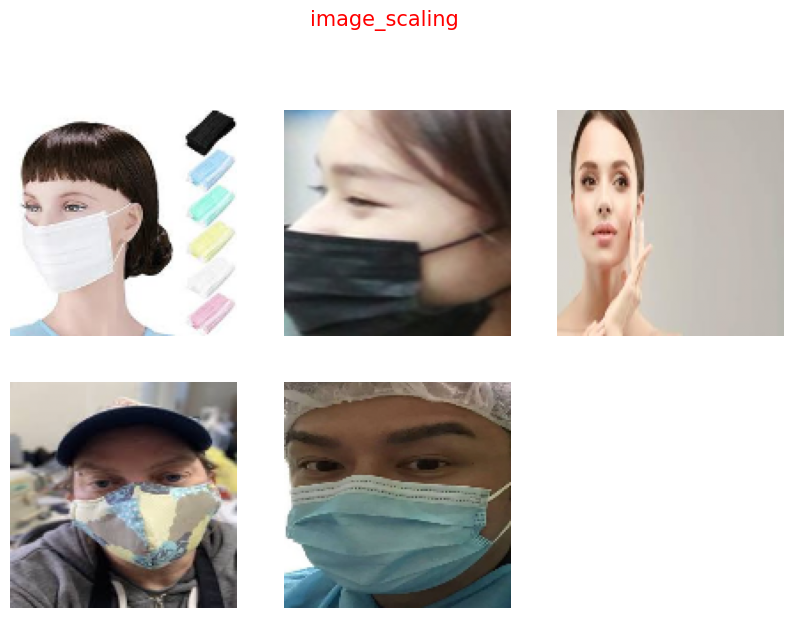

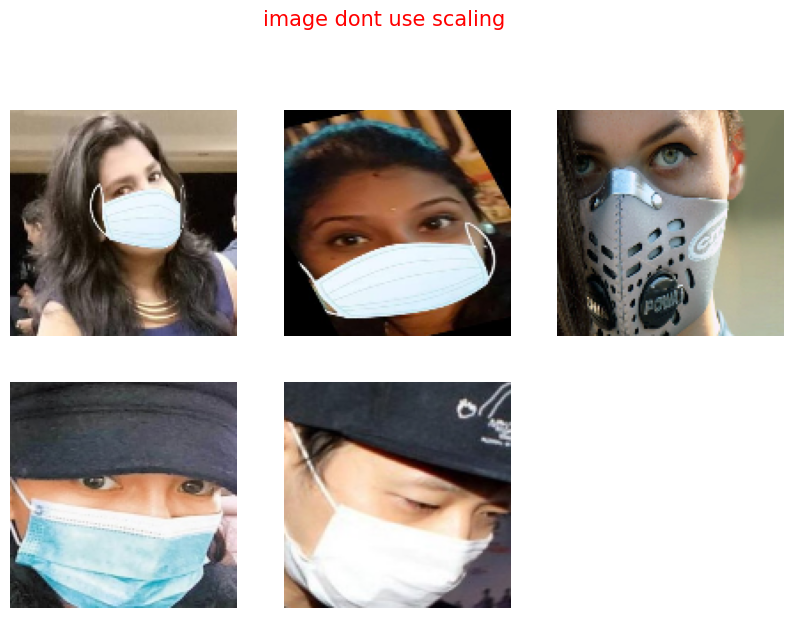

In [19]:
display_images(X_train_scaled[:5],'image_scaling')
display_images(X[:5],'image dont use scaling')


**Building a Convolutional Neural Networks (CNN)**

In [20]:
model = keras.Sequential()
odel = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 126, 126, 32)      896       

                                                                 

 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         

 D)                                                              

                                                                 

 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     

                                                                 

 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         

 g2D)                                                            

                                                                 

 flatten (Flatten)           (None, 57600)             0         

                                                                 

 dense (Dense)               (None, 64) 

In [22]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.15, epochs=7)

Epoch 1/7

171/171 [==============================] - 11s 24ms/step - loss: 0.4448 - accuracy: 0.7882 - val_loss: 0.2652 - val_accuracy: 0.8930

Epoch 2/7

171/171 [==============================] - 3s 17ms/step - loss: 0.3024 - accuracy: 0.8849 - val_loss: 0.2323 - val_accuracy: 0.8899

Epoch 3/7

171/171 [==============================] - 3s 19ms/step - loss: 0.2543 - accuracy: 0.9054 - val_loss: 0.2015 - val_accuracy: 0.9159

Epoch 4/7

171/171 [==============================] - 3s 17ms/step - loss: 0.2139 - accuracy: 0.9150 - val_loss: 0.1866 - val_accuracy: 0.9273

Epoch 5/7

171/171 [==============================] - 3s 18ms/step - loss: 0.1848 - accuracy: 0.9249 - val_loss: 0.1856 - val_accuracy: 0.9211

Epoch 6/7

171/171 [==============================] - 3s 17ms/step - loss: 0.1637 - accuracy: 0.9373 - val_loss: 0.1902 - val_accuracy: 0.9252

Epoch 7/7

171/171 [==============================] - 3s 20ms/step - loss: 0.1561 - accuracy: 0.9375 - val_loss: 0.2183 - val_accuracy:

In [24]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 0s 11ms/step - loss: 0.2052 - accuracy: 0.9162


In [25]:
print(f'loss data test : {loss}')
print(f'accuracy data test : {accuracy}')

loss data test : 0.20521363615989685

accuracy data test : 0.9161518216133118


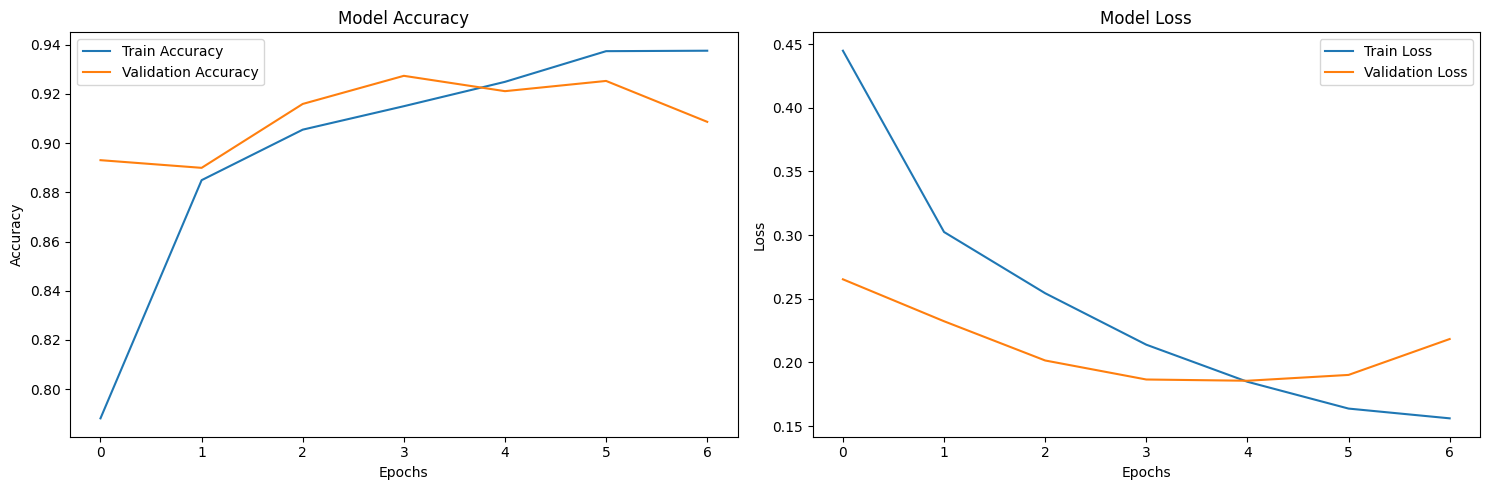

In [26]:
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
def deployment(path_file):
  image=cv2.imread(path_file)
  cv2_imshow(image)
  image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(128,128))
  image=np.array(image)
  image=image/255
  image_rshape=np.reshape(image,[1,128,128,3])
  prediction=model.predict(image_rshape)
  image_label=np.argmax(prediction)
  if image_label==1:
    print("The image with mask")
  else:
    print("The image without mask")

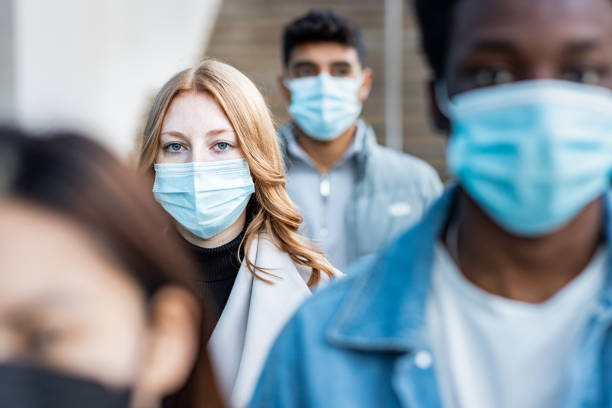

1/1 [==============================] - 1s 608ms/step

The image with mask


In [29]:
deployment('/content/ئ.jpg')

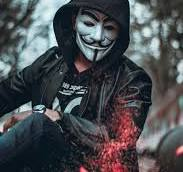

1/1 [==============================] - 0s 74ms/step

The image with mask


In [30]:
deployment('/content/تنزيل.jpg')

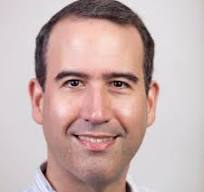

1/1 [==============================] - 0s 59ms/step

The image without mask


In [31]:
deployment('/content/mask.jpg')

In [32]:
y_predict=model.predict(X_test_scaled)

36/36 [==============================] - 0s 8ms/step


In [36]:
y_labels=[np.argmax(i) for i in y_predict ]
print(f"The label prediction {y_labels[0:5]}")

The label prediction [1, 0, 1, 0, 1]


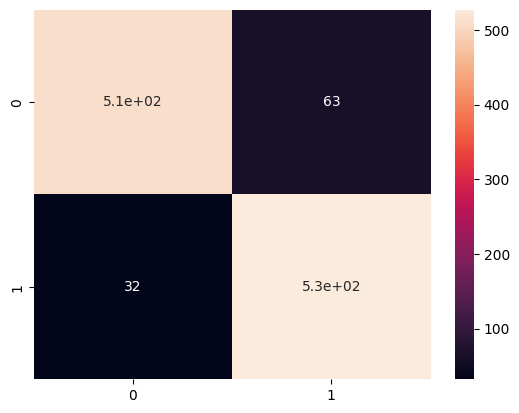

In [46]:
confusionmatrix=confusion_matrix(y_test,y_labels)
sns.heatmap(confusionmatrix,annot=True)
plt.show()

In [47]:
print(classification_report(y_labels,y_test))

              precision    recall  f1-score   support



           0       0.89      0.94      0.91       543

           1       0.94      0.89      0.92       590



    accuracy                           0.92      1133

   macro avg       0.92      0.92      0.92      1133

weighted avg       0.92      0.92      0.92      1133


